## Create a list of ASINs for Cookbooks

In [137]:
# --- Imports
import numpy as np
import pandas as pd
from collections import defaultdict


# --- Inputs: Amazon books metadata file
amznBooks = "../data/amzn/meta_Books.json"

# --- Outputs: Write Cookbooks metadata into this file:
amznCookbooks = "../data/amzn/meta_Cookbooks.json"

# --- Outputs: Write Cookbooks ASINs into this file:
# --- ASINs will be used for counting number of reviews, descriptions, time stamp etc.
amznCookbook_asins = "../data/amzn/meta_Cookbooks_asins.csv"

# --- Parser for reading in the Amazon json files (can be used for both reviews and metadata)
def parse(path):
    g = open(path, 'r')
    for l in g:
        yield json.loads(l)
        
# --- Open files streams for the output files for writing
fckbks = open(amznCookbooks, "w")
fckbks_asins = open(amznCookbook_asins, "w")

count = 0
for line in parse(amznBooks):
    if 'category' in line.keys() and 'description' in line.keys() and "Cookbooks, Food & Wine" in line['category']:
        fckbks.write(json.dumps(line)+"\n")
        fckbks_asins.write(line['asin']+'\n')
        count += 1
    #if count>30:
    #    break

print(f"Number of books with cookbook category: {count}")

Number of books with cookbook category: 44836


## Create a JSON file of Cookbook Reviews from All Books Reviews

In [144]:
# --- Inputs
amzn_book_reviews = "../data/amzn/Books_5.json"
amznCookbook_asins = "../data/amzn/meta_Cookbooks_asins.csv"

# --- Outputs
amzn_cookbook_reviews = "../data/amzn/Cookbooks.json"

# --- Parser for reading in the Amazon json files (can be used for both reviews and metadata)
def parse(path):
    g = open(path, 'r')
    for l in g:
        yield json.loads(l)

# --- Review count summaries        
review_counts_by_book = defaultdict(int)
review_counts_by_year = defaultdict(int)

# --- Read in ASINs to extract cookbook reviews. Saved under fckbks_asins
fckbks_asins = open(amznCookbook_asins, "r")
for line in fckbks_asins:
    review_counts_by_book[line.strip()] = 0
fckbks_asins.close()
cookbook_asins = review_counts_by_book.keys()

# --- Create JSON file of cookbook reviews
fckbks_reviews = open(amzn_cookbook_reviews, "w")
#count = 0

for line in parse(amzn_book_reviews):
    review_keys = line.keys()
    
    if 'asin' in review_keys and line['asin'] in cookbook_asins:
        fckbks_reviews.write(json.dumps(line)+'\n')
        review_counts_by_book[line['asin']] += 1
        count += 1
        assert line['reviewTime'] != None
        review_counts_by_year[line['reviewTime'][-4:]] += 1
    #if count>30:
    #    break
fckbks_reviews.close()

# --- Write cookbook review counts by book
file_to_write = open("../data/amzn/review_counts_by_cookbook.json", "w")
file_to_write.write(json.dumps(review_counts_by_book))
file_to_write.close()

# --- Write cookbook review counts by uyear
file_to_write = open("../data/amzn/review_counts_by_year.json", "w")
file_to_write.write(json.dumps(review_counts_by_year))
file_to_write.close()

print(len(review_counts_by_book.keys()))

44812


## General Summaries of Cookbook Reviews

defaultdict(<class 'int'>, {'2016': 65910, '2015': 74125, '2014': 70404, '2013': 53505, '2012': 22392, '2010': 11814, '2007': 7157, '2006': 3940, '2005': 3130, '2003': 1684, '2001': 1612, '2000': 1284, '2008': 7592, '2017': 51782, '2009': 10487, '2011': 14664, '1999': 267, '2004': 2006, '2002': 1715, '1998': 119, '2018': 22906, '1997': 27})


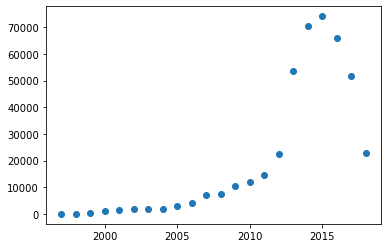

In [145]:
print(review_counts_by_year)
import matplotlib.pyplot as plt
%matplotlib inline

xs = [int(i) for i in review_counts_by_year.keys()]
plt.scatter(xs, review_counts_by_year.values())

In [152]:
import numpy as np
review_count = [0]*4
book_count = [0]*4
for key, value in review_counts_by_book.items():
    review_count[0] += value
    book_count[0] += 1
    if value>=5:
        review_count[1] += value
        book_count[1] += 1
    if value<5 and value>0:
        review_count[2] += value
        book_count[2] += 1
    if value==0:
        review_count[3] += value
        book_count[3] += 1
print(f"Number of cookbooks: {book_count}")
print(f"Number of cookbook reviews: {review_count}")
print(f"Number of books with no reviews: {(28905+12)/44676}")
print(f"Number of reviews per book: {428199/15759}")
byYear_count_sum = np.sum(list(review_counts_by_year.values()))
print(f"Number of reviews from 'review counts by year': {byYear_count_sum}")

counts_by_year = pd.DataFrame(list(zip(xs, list(review_counts_by_year.values()))), columns=["Year", "Count"])
counts_by_year.sort_values(by="Year", inplace=True)
counts_by_year

Number of cookbooks: [44812, 15770, 12, 29030]
Number of cookbook reviews: [428522, 428482, 40, 0]
Number of books with no reviews: 0.6472602739726028
Number of reviews per book: 27.171711403007805
Number of reviews from 'review counts by year': 428522


,Year,Count
21,1997,27
19,1998,119
16,1999,267
11,2000,1284
10,2001,1612
18,2002,1715
9,2003,1684
17,2004,2006
8,2005,3130
7,2006,3940


In [166]:
cookbook_reviews_path = "../data/amzn/Cookbooks.json"
cookbook_meta_path = "../data/amzn/meta_Cookbooks.json"

def first_n_lines(file_name, n=10):
    count = 0
    for l in parse(file_name):
        count += 1
        print(l)
        if count>n or count>100:
            break

first_n_lines(cookbook_reviews_path, n=5)
first_n_lines(cookbook_meta_path, n=5)

{'overall': 5.0, 'verified': True, 'reviewTime': '08 5, 2016', 'reviewerID': 'A256TXY2E0KVSL', 'asin': '000215949X', 'style': {'Format:': ' Hardcover'}, 'reviewerName': 'David Yates', 'reviewText': 'Fantastic book, as with the rest in the series. The Beautiful Cookbook series is by far the gold standard for photography, recipes and in-depth information for the countries which they feature. Should be a required book series in every home !!', 'summary': 'Fantastic book, as with the rest in the series', 'unixReviewTime': 1470355200}
{'overall': 5.0, 'verified': True, 'reviewTime': '03 5, 2016', 'reviewerID': 'A2A0X84N67HBLK', 'asin': '000215949X', 'style': {'Format:': ' Hardcover'}, 'reviewerName': 'L. G.', 'reviewText': 'I loved it.', 'summary': 'Five Stars', 'unixReviewTime': 1457136000}
{'overall': 5.0, 'verified': True, 'reviewTime': '10 6, 2015', 'reviewerID': 'ATKEGNMMH5PSX', 'asin': '000215949X', 'style': {'Format:': ' Hardcover'}, 'reviewerName': 'John H. Hamilton', 'reviewText': 